# Exploring Generative AI for Data Generation

Author: Yamini Manral (manral.y@northeastern.edu)

Note: Download supporting files from [PDF Bot Supporting files](https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/tree/main/CSV/PDF%20Bot%20Supporting%20files)

### Abstract 

In this Jupyter notebook, we delve into the development of a PDF bot powered by the Flan-T5 language model. This innovative bot seamlessly consumes PDF documents and provides insightful responses to user queries related to their content. Harnessing the Flan-T5 model's advanced natural language processing capabilities, we construct a bot capable of effectively comprehending and interacting with PDF-based information, enabling users to pose natural language questions about PDF documents and receive insightful responses.

### Introduction: Document Analysis

Document analysis or PDF bot refers to the use of automated systems or bots to analyze and extract information from documents, particularly those in PDF format. These bots are designed to understand and process the content within documents, extracting relevant data, and performing various tasks such as text extraction, summarization, question-answering, and more. The primary goal is to make sense of the information within documents in a structured and efficient manner.

Key components of a document analysis or PDF bot may include:

1. **Document Loading:** The bot can load documents from various sources, such as local files, online repositories, or document-sharing platforms.

2. **Text Extraction:** Extracting text from documents is a fundamental step. Bots use techniques to convert the content within documents, especially PDFs, into machine-readable text.

3. **Text Splitting:** For large documents, bots may employ strategies to split the text into manageable chunks, facilitating more effective analysis.

4. **Text Processing:** Bots can perform natural language processing tasks on the extracted text, such as sentiment analysis, entity recognition, or language translation.

5. **Generative AI Techniques:** Some document bots may utilize generative AI techniques to generate relevant and context-aware responses based on queries or prompts.

6. **Vector Embeddings:** Embedding techniques, like vector embeddings, can be employed to represent the semantic meaning of text and facilitate similarity searches.

7. **Retrieval Mechanisms:** Bots may include retrieval mechanisms to find and present relevant documents or sections based on user queries.



**Applications and Use Cases:** Document analysis and PDF bots find applications in various domains:

1. **Information Retrieval:** Used to quickly search, retrieve, and summarize information from large document collections.

2. **Legal and Compliance:** Bots can assist in legal research, contract analysis, and compliance monitoring by extracting and summarizing relevant legal information.

3. **Knowledge Management:** Helps organize and manage knowledge by extracting key insights from documents.

4. **Customer Support:** Bots can assist in responding to customer queries by extracting relevant information from documents or manuals.

5. **Data Augmentation:** Used to generate synthetic data for training machine learning models, enhancing datasets for improved model performance.

6. **Research and Development:** Supports researchers in reviewing and summarizing research papers, articles, and technical documents.

7. **Human Resources:** Assists in processing resumes, extracting relevant information, and automating aspects of recruitment processes.

**Theoretical Underpinnings:**
- **GPT-3.5 Turbo:** This model is based on the Transformer architecture, which uses attention mechanisms to capture contextual relationships in data.
- **T5 Models:** These models utilize the "Text-to-Text" framework, treating all NLP tasks as converting input text to target text, providing a unified approach to various language tasks.

### Introduction to Data Generation



#### Concise overview of the data generation process using generative AI. Detail the context, significance, and principles behind data generation
We will use our PDF bot to read the input PDF and then we will try to query the bot about the PDF to get answers about it's contents.

**Context:**
- Leveraging generative AI for data synthesis.
- Creating synthetic data mimicking real-world scenarios.

**Significance:**
- Augmenting existing datasets for machine learning.
- Providing diverse and extensive training data.
  
**Principles:**
- Ensuring data diversity.
- Upholding ethical considerations.
- Enhancing algorithm robustness through varied data.

#### Description of the chosen generative AI technique and its purpose in data generation

**Generative AI Technique:**
- Utilizing the Flan T5 Base model.

**Purpose:**
- Text-to-text generation for synthetic data creation.
- Reproducing linguistic patterns from input data.
  
**Model Characteristics:**
- Coherent and contextually relevant responses.
- Contribution to dataset augmentation in machine learning tasks.

### Analyzing and Engaging with the Generated Data

I used the document "DANNY SMITH.pdf" as an input file and tried to query the PDF bot.

**Data Characteristics:**
- The generated data consists of textual responses to user queries about PDF documents.
- It captures semantic understanding, context, and relevant information from the PDF content.

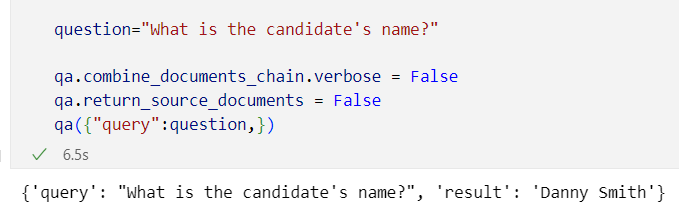

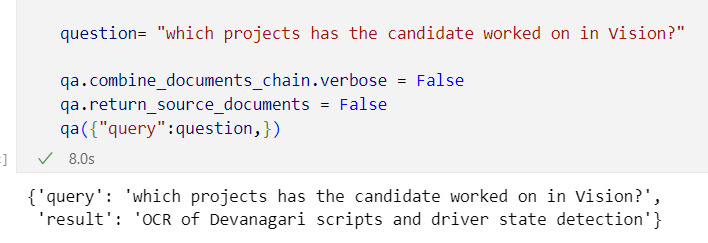

**Application Areas:**
- Answering user queries about PDF content.
- Enhancing the performance of data-driven applications that require natural language understanding.

**Analytical Insights:**
- The generated data provides insights into the language understanding capabilities of the models.
- It enables the extraction of meaningful information from unstructured text.

**Queries and Exploration:**
- Engage with the generative AI by querying it about the document content.
- Explore different scenarios to understand the model's responses under various contexts.
- Validate the quality and diversity of generated responses.

Another query made to the same PDF:

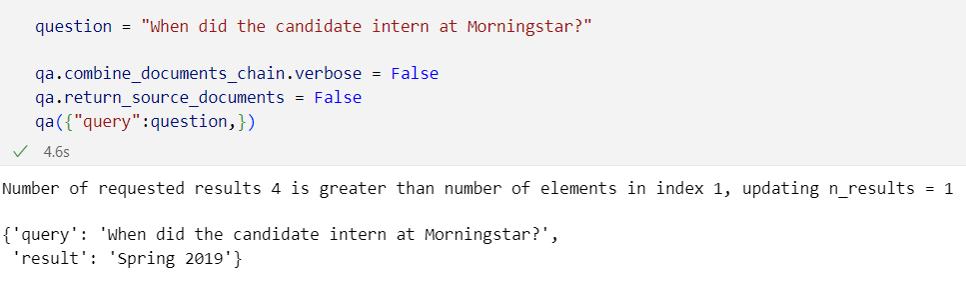

This is how FLAN T5 model generates data: A high-level overview of how the Flan T5 Base model generates data:

1. **Text-to-Text Framework:** T5 is designed with a unified framework for various natural language processing tasks. Both input and output are treated as text, allowing the model to handle a wide range of tasks, including text generation.

2. **Prompt-Based Generation:** The model is typically prompted with a specific instruction or question in the form of input text. This prompt guides the model on what type of data to generate.
   
3. **Context Understanding:** The Flan T5 Base model utilizes its pre-trained knowledge to understand the context provided in the prompt. This involves capturing the relationships between words, phrases, and the overall structure of the input.

4. **Conditional Generation:** Based on the input prompt, the model conditions its internal parameters to generate a relevant and coherent output. The output is generated in a text format.

5. **Variable Outputs:** The Flan T5 Base model is capable of generating variable-length outputs. The length and complexity of the generated text depend on the nature of the input prompt and the task it is instructed to perform.

6. **Task Adaptability:** One of the strengths of the T5 architecture, including Flan T5 Base, is its adaptability to various tasks. It can handle tasks such as summarization, translation, question answering, and text generation, making it versatile for different applications.

7. **Fine-Tuning for Specific Tasks:** While pre-trained on a diverse range of tasks, the model can be fine-tuned on specific datasets to specialize in certain domains or applications.

### Crafting the Generated Data

**Data Generation Task:** Document analysis and PDF bots contribute to increased efficiency, accuracy, and automation in handling large volumes of textual information across diverse industries and sectors.

The PDF bot is supposed to answer objective questions about the PDF as seen below in the example prompt:

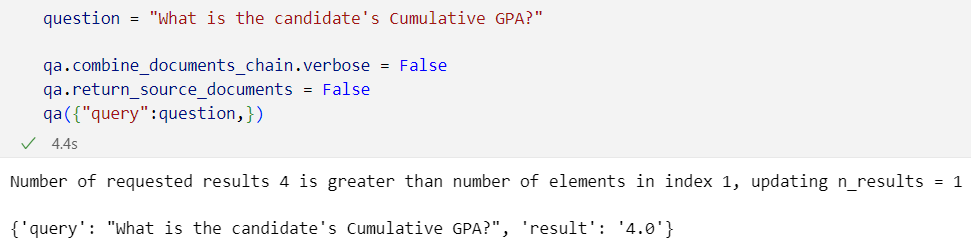

**Generated Data Format:**
The generated data is in texual format, concise, and to the point. The model is not able to give long, descriptive answers but it is able to provide with a relatively useful response. Here is another example:

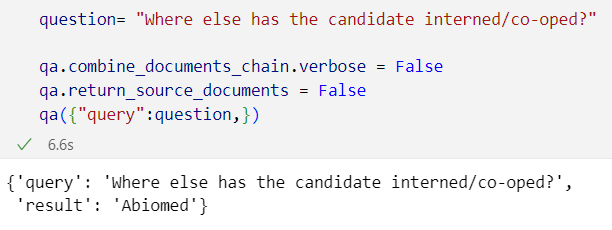


### Demonstrating Data Generation Process

**Implementation:** We implement these libraries (also see requirements.txt for complete range of libraries required). We import various libraries and modules necessary for working with language models, document processing, and embeddings.


In [ ]:
from langchain.document_loaders import PDFPlumberLoader
from langchain.text_splitter import CharacterTextSplitter, TokenTextSplitter
from transformers import pipeline
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain import HuggingFacePipeline
from langchain.embeddings import HuggingFaceInstructEmbeddings, HuggingFaceEmbeddings
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.llms import OpenAI
from constants import *
from transformers import AutoTokenizer
import torch
import os
import re

We define constants for model names and sets up a configuration dictionary with various parameters like the embedding model, language model, and persistence directory.

In [3]:
config = {"persist_directory":None,
          "load_in_8bit":False,
          "embedding" : EMB_SBERT_MPNET_BASE,
          "llm":LLM_FLAN_T5_BASE,
          }

This code defines a Python dictionary named `config` with four key-value pairs. Each key corresponds to a configuration option, and the associated value determines the setting for that option.

1. `"load_in_8bit": False`: This option is a boolean flag (True/False) that indicates whether to load something in 8-bit mode. In this case, it is set to `False`, meaning that whatever is being loaded should not use 8-bit mode.

2. `"embedding": EMB_SBERT_MPNET_BASE`: This option is related to embedding and is set to the value of `EMB_SBERT_MPNET_BASE`. 

3. `"llm": LLM_FLAN_T5_BASE`: This option is related to a language model (LLM), and it is set to the value of `LLM_FLAN_T5_BASE`. 


Following functions define how to create different language models using the Hugging Face library. Models include Sentence-BERT MPNet embeddings and Flan T5 Base.

In [4]:
def create_sbert_mpnet():
        device = "cuda" if torch.cuda.is_available() else "cpu"
        return HuggingFaceEmbeddings(model_name=EMB_SBERT_MPNET_BASE, model_kwargs={"device": device})

This function is designed to create an instance of the HuggingFaceEmbeddings class Sentence-BERT (SBERT) with a model based on the MPNet architecture.

In [5]:
def create_flan_t5_base(load_in_8bit=False):
        # Wrap it in HF pipeline for use with LangChain
        model="google/flan-t5-base"
        tokenizer = AutoTokenizer.from_pretrained(model)
        return pipeline(
            task="text2text-generation",
            model=model,
            tokenizer = tokenizer,
            max_new_tokens=100,
            model_kwargs={"device_map": "auto", "load_in_8bit": load_in_8bit, "max_length": 512, "temperature": 0.}
        )

if config["embedding"] == EMB_SBERT_MPNET_BASE:
    embedding = create_sbert_mpnet()
load_in_8bit = config["load_in_8bit"]
if config["llm"] == LLM_FLAN_T5_BASE:
    llm = create_flan_t5_base(load_in_8bit=load_in_8bit)

c:\Users\Yamini Manral\Downloads\chatbot_app\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(


This function creates a text-to-text generation pipeline using the Hugging Face Transformers library. It uses the T5 model from the Flan model collection. The function takes an optional argument `load_in_8bit`, which is set to `False` by default. The T5 model is loaded with the specified model name (`"google/flan-t5-base"`) and a tokenizer is created accordingly. The function then returns a pipeline for text-to-text generation with specific keyword arguments such as `device_map`, `load_in_8bit`, `max_length`, and `temperature`.

In [6]:
# Load the pdf
pdf_path = "DANNY SMITH.pdf"
loader = PDFPlumberLoader(pdf_path)
documents = loader.load()

# Split documents and create text snippets
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=0)
texts = text_splitter.split_documents(documents)
text_splitter = TokenTextSplitter(chunk_size=1000, chunk_overlap=10, encoding_name="cl100k_base")  # This the encoding for text-embedding-ada-002
texts = text_splitter.split_documents(texts)

persist_directory = config["persist_directory"]
vectordb = Chroma.from_documents(documents=texts, embedding=embedding, persist_directory=persist_directory)

1. **Load the PDF:**
   Code uses the `PDFPlumberLoader` class to load the contents of the PDF file into the `documents` variable.


2. **Text Splitting:**
   - It creates a `CharacterTextSplitter` object with a specified `chunk_size` of 100 and `chunk_overlap` of 0.
   - It splits the loaded documents into text chunks using the character-based text splitter.
   - It creates a `TokenTextSplitter` object with a `chunk_size` of 1000, `chunk_overlap` of 10, and a specified encoding ("cl100k_base").
   - It splits the previously obtained text chunks (from character-based splitting) into token-based text chunks.

3. **Vectorization (Embedding):**
   - It retrieves the "persist_directory" from the `config` dictionary.
   - It uses the `Chroma.from_documents` method to create a vector database (`vectordb`) from the processed text documents (`texts`).
   - The vectorization is performed using an embedding method specified by the `embedding` variable. The vectorized representations are stored in the specified "persist_directory."


In [7]:
hf_llm = HuggingFacePipeline(pipeline=llm)
retriever = vectordb.as_retriever(search_kwargs={"k":1})
qa = RetrievalQA.from_chain_type(llm=hf_llm, chain_type="stuff",retriever=retriever)

# Defining a default prompt for flan models
if config["llm"] == LLM_FLAN_T5_SMALL or config["llm"] == LLM_FLAN_T5_BASE or config["llm"] == LLM_FLAN_T5_LARGE:
    question_t5_template = """
    Scan the document with context as {context}
    and answer the questions asked on it as {question}
     
    """
    QUESTION_T5_PROMPT = PromptTemplate(
        template=question_t5_template, input_variables=["context", "question"]
    )
    qa.combine_documents_chain.llm_chain.prompt = QUESTION_T5_PROMPT

1. **Hugging Face Pipeline and Vector Retrieval Setup:**
   - It creates an instance of `HuggingFacePipeline` (`hf_llm`) using the specified `llm`.
   - It creates a retriever from the vector database (`vectordb`) with search parameters specified by `search_kwargs`.


2. **Question-Answering Setup:**
   - It creates a question-answering system (`qa`) using the `RetrievalQA.from_chain_type` method.
   - The language model (`llm`) is provided as the Hugging Face pipeline (`hf_llm`).
   - The `chain_type` is set to "stuff" (the meaning of this depends on the specific implementation).
   - The retriever is set to the previously created retriever (`retriever`).

3. **Prompt Definition for Flan Models:**
   - It checks if the language model specified in the `config` dictionary is one of the Flan T5 models (`LLM_FLAN_T5_SMALL`, `LLM_FLAN_T5_BASE`, or `LLM_FLAN_T5_LARGE`).
   - If true, it defines a template (`question_t5_template`) for question-answering with a context and a question. The answer field is left empty.
   - It creates a `PromptTemplate` using the defined template and input variables.
   - It sets this prompt template as the prompt for the language model chain in the question-answering system.

In [8]:
question = "What is candidate's phone number?"

qa.combine_documents_chain.verbose = False
qa.return_source_documents = False
qa({"query":question,})

Token indices sequence length is longer than the specified maximum sequence length for this model (642 > 512). Running this sequence through the model will result in indexing errors
c:\Users\Yamini Manral\Downloads\chatbot_app\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
c:\Users\Yamini Manral\Downloads\chatbot_app\.venv\Lib\site-packages\transformers\generation\utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the

{'query': "What is candidate's phone number?", 'result': '(617)-431-5067'}

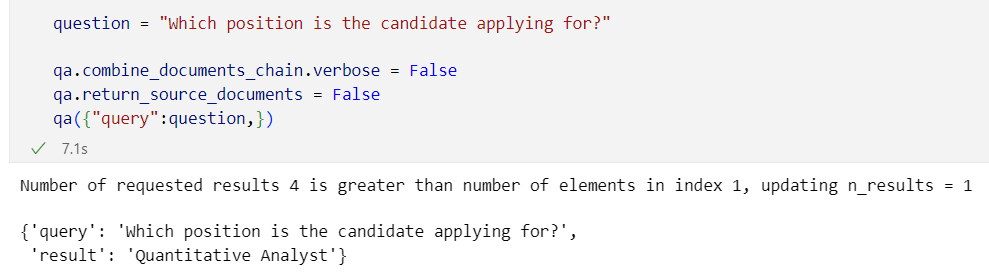

### Evaluation and Justification



**Evaluation Criteria:** Accessing the quality of generated results from the provided code involves evaluating the output based on various criteria.

**1. Ground Truth Comparison:** Since the input PDF is not very huge, I can directly compare the output generated to the facts in the PDF. IN this case, answers generated are correct and concise.

**2. Semantic Coherence:** The generated text aligns with the context of the query and is logically structured.

**3. Human Evaluation:** The output does not feel natural but it ranks high on being relevant and informative.

**4. Consistency and Reproducibility:** Upon re-running the code with the same input multiple times, the model reproduces the same output, maintianing consistency.

**5. Testing with new data:** Upon inserting new PDF, the model is still able to correctly answer the queries.

**6. Contextual Understanding:** The model is able to comprehend and incorporate context, it generates meaningful responses based on the input context i.e. the PDF.

**7. Time and Resource Efficiency:** The computational resources and time required for generating results is not high at all, infact if you have an understanding of what kind of questions to ask, the model can generate impressive results efficiently.

### References and Resources


- [Building a PDF Knowledge Bot With Open-Source LLMs - A Step-by-Step Guide](https://www.shakudo.io/blog/build-pdf-bot-open-source-llms)
- [Let's build GPT: from scratch, in code, spelled out.](https://www.youtube.com/watch?v=kCc8FmEb1nY&t=1316s)
- [Hugging Face Transformers Documentation](https://huggingface.co/transformers/)
- [google/flant5-base](https://huggingface.co/google/flan-t5-base)
- [PDFPlumber Documentation](https://github.com/jsvine/pdfplumber)
- [OpenAI - Text generation models](https://platform.openai.com/docs/guides/text-generation)